# Proyecto: Clasificación de Actividades

## Importación de Datos

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import scipy as sci
from scipy.stats import mode
import re

raw=pd.read_csv('CREDITRISK_RAW.csv',delimiter=';',header=None)

#print(raw)

def get_stats(raw):
    data=raw.as_matrix()
    #print(data)
    PAGA_count=0
    x,y=[],[]
    for i in range(1,len(data)):
        xi,yi=[],[]
        for j in range(0,len(data[0])-1):
            xi.append(data[i][j])
        yi.append(data[i][len(data[0])-1])
        x.append(xi)
        y.append(yi)
     
    print("Cantidad de datos: {}".format(len(x)))
    print("Cantidad de características: {}".format(len(x[0])))
    #print(y[0])
    for i in range(0,len(y)):
        if y[i][0]=='PAGA':
            PAGA_count+=1
    print("Cuantos clientes pagan: {}/{}:".format(PAGA_count,len(data)))
    return



In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

dataset = pd.read_csv('CREDITRISK_RAW.csv',delimiter=';')
dataset=dataset.dropna()
features = dataset.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
y_data = dataset.iloc[:, [19]]
#data=dataset.as_matrix()

get_stats(dataset)



Cantidad de datos: 2239
Cantidad de características: 19
Cuantos clientes pagan: 1098/2240:


C:\Users\Giopa\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [3]:
#target
#print(y_data)
print(len(y_data))
y_data=y_data[1:len(y_data)]
labelencoder_y = LabelEncoder()
y_data = labelencoder_y.fit_transform(y_data)

print(len(y_data))
#-----------------------------------------------------------------------------
#Genero
gen = dataset.iloc[:, [1]]

gen = gen[1:len(gen)]

labelencoder_edad = LabelEncoder()
gen = labelencoder_edad.fit_transform(gen)
#------------------------------------------------------------------------------
#Edad
edad = dataset.iloc[:, [3]]

edad = edad[1:len(edad)]

#------------------------------------------------------------------------------
#Nivel Educacional
niv_ed = dataset.iloc[:, [4]]

niv_ed = niv_ed[1:len(niv_ed)]

#------------------------------------------------------------------------------
#Nivel Educacional
renta = dataset.iloc[:, [2]]

renta = renta[1:len(renta)]

#------------------------------------------------------------------------------
#Nivel Educacional
monto = dataset.iloc[:, [13]]

monto = monto[1:len(monto)]

#------------------------------------------------------------------------------
#Nivel Educacional
dias_mora = dataset.iloc[:, [14]]

dias_mora = dias_mora[1:len(dias_mora)]

#labelencoder_gen = LabelEncoder()
#gen = labelencoder_edad.fit_transform(gen)



2240
2239


C:\Users\Giopa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


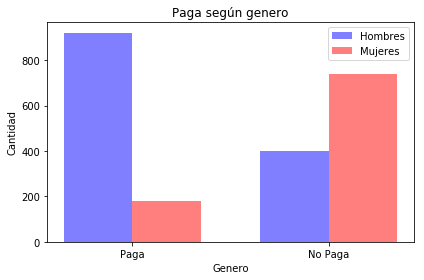

In [4]:
#grafico Genero
M_P,F_P,M_NP,F_NP=0,0,0,0

for i in range(0,len(y_data)):
    #mujer
    if gen[i]==0:
        if y_data[i]==1:
            F_P+=1
        else:
            F_NP+=1
    #hombre
    if gen[i]==1:
        if y_data[i]==1:
            M_P+=1
        else:
            M_NP+=1
            
            
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

n_groups = 2

men = (M_P, M_NP)
women = (F_P, F_NP)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, men, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Hombres')

rects2 = ax.bar(index + bar_width, women, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='Mujeres')

ax.set_xlabel('Genero')
ax.set_ylabel('Cantidad')
ax.set_title('Paga según genero')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Paga', 'No Paga'))
ax.legend()

fig.tight_layout()
plt.show()

C:\Users\Giopa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


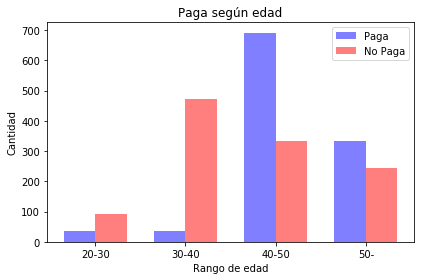

In [5]:
#grafico Genero

edad_arr=edad.as_matrix()
edad_arr=np.reshape(edad_arr,-1)

P_20,NP_20,P_30,NP_30,P_40,NP_40,P_50,NP_50=0,0,0,0,0,0,0,0

for i in range(0,len(y_data)):
    #mujer
    if int(edad_arr[i])>=20 and int(edad_arr[i])<30:
        if y_data[i]==1:
            P_20+=1
        else:
            NP_20+=1
    if int(edad_arr[i])>=30 and int(edad_arr[i])<40:
        if y_data[i]==1:
            P_30+=1
        else:
            NP_30+=1
    if int(edad_arr[i])>=40 and int(edad_arr[i])<50:
        if y_data[i]==1:
            P_40+=1
        else:
            NP_40+=1
    if int(edad_arr[i])>=50 :
        if y_data[i]==1:
            P_50+=1
        else:
            NP_50+=1
    

n_groups = 4

P_edad = (P_20, P_30,P_40, P_50)
NP_edad = (NP_20, NP_30,NP_40, NP_50)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, P_edad, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Paga')

rects2 = ax.bar(index + bar_width, NP_edad, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='No Paga')

ax.set_xlabel('Rango de edad')
ax.set_ylabel('Cantidad')
ax.set_title('Paga según edad')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('20-30', '30-40','40-50', '50-'))
ax.legend()

fig.tight_layout()
plt.show()

C:\Users\Giopa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


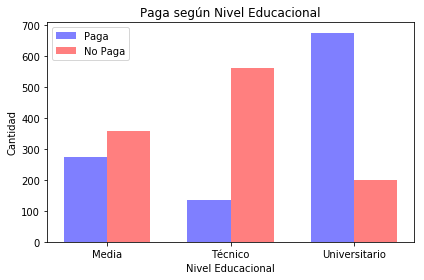

In [6]:
#grafico Nivel Educacional

niv_ed_arr=niv_ed.as_matrix()
niv_ed_arr=np.reshape(niv_ed_arr,-1)

P_Med, NP_Med, P_Tec, NP_Tec, P_Uni, NP_Uni = 0, 0, 0, 0, 0, 0 

for i in range(0,len(y_data)):
    nivel = str(niv_ed_arr[i])
    nivel = re.sub(' +','',nivel)
    if nivel.upper() == 'MED':        
        if y_data[i]==1:
            P_Med+=1
        else:
            NP_Med+=1
    #Tec
    if nivel.upper() == 'TEC':
        if y_data[i]==1:
            P_Tec+=1
        else:
            NP_Tec+=1
    #Uni
    if nivel.upper() == 'UNV':
        if y_data[i]==1:
            P_Uni+=1
        else:
            NP_Uni+=1

    

n_groups = 3

P_niv_ed = (P_Med, P_Tec, P_Uni)
NP_niv_ed = (NP_Med, NP_Tec, NP_Uni)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, P_niv_ed, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Paga')

rects2 = ax.bar(index + bar_width, NP_niv_ed, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='No Paga')

ax.set_xlabel('Nivel Educacional')
ax.set_ylabel('Cantidad')
ax.set_title('Paga según Nivel Educacional')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Media', 'Técnico','Universitario'))
ax.legend()

fig.tight_layout()
plt.show()

C:\Users\Giopa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


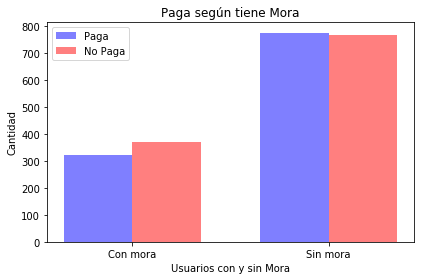

In [7]:
#grafico Mora

dias_mora_arr=dias_mora.as_matrix()
dias_mora_arr=np.reshape(dias_mora_arr,-1)
P_m, NP_m, P_nm, NP_nm = 0,0,0,0

for i in range(0,len(y_data)):
    #0 días
    if int(dias_mora_arr[i])==0:
        if y_data[i]==1:
            P_nm+=1
        else:
            NP_nm+=1
    if int(dias_mora_arr[i])>0 :
        if y_data[i]==1:
            P_m+=1
        else:
            NP_m+=1
    

n_groups = 2

P_dias_mora = (P_m, P_nm)
NP_dias_mora = (NP_m, NP_nm)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, P_dias_mora, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Paga')

rects2 = ax.bar(index + bar_width, NP_dias_mora, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='No Paga')

ax.set_xlabel('Usuarios con y sin Mora')
ax.set_ylabel('Cantidad')
ax.set_title('Paga según tiene Mora')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Con mora','Sin mora'))
ax.legend()

fig.tight_layout()
plt.show()

In [8]:
# MONTO vs RENTA

renta_arr=renta.as_matrix()
renta_arr=np.reshape(renta_arr,-1)

monto_arr=monto.as_matrix()
monto_arr=np.reshape(monto_arr,-1)

monto_P,monto_NP=[],[]
renta_P,renta_NP=[],[]

for i in range(0,len(renta_arr)):
    
    if y_data[i]==1:
        monto_P.append(int(re.sub('\.','',monto_arr[i])))
        renta_P.append(int(re.sub('\.','',renta_arr[i])))
    else:
        monto_NP.append(int(re.sub('\.','',monto_arr[i])))
        renta_NP.append(int(re.sub('\.','',renta_arr[i])))
        

    
#renta_arr = [int(i) for i in renta_arr]

#monto_arr = [int(i) for i in monto_arr]

plt.scatter(renta_P,monto_P)
plt.scatter(renta_NP,monto_NP)
plt.legend(['Paga','No Paga'])
plt.show()

C:\Users\Giopa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Giopa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


TypeError: cannot use a string pattern on a bytes-like object

In [9]:
dataset.dtypes

ID                          float64
GENERO                       object
RENTA                        object
EDAD                        float64
NIV_EDUC                     object
E_CIVIL                      object
COD_OFI                       int64
COD_COM                      object
CIUDAD                       object
Crédito_1                    object
Crédito_2                    object
Crédito_3                    object
Crédito_4                    object
Monto solicitado            float64
Días de Mora                  int64
Monto Deuda Promedio        float64
Número de meses inactivo      int64
numero de cuotas              int64
Aval                         object
PAGA                         object
dtype: object

In [10]:
labelencoder_X = LabelEncoder()
features['GENERO'] = labelencoder_X.fit_transform(features['GENERO'])
features['NIV_EDUC'] = labelencoder_X.fit_transform(features['NIV_EDUC'])
features['E_CIVIL'] = labelencoder_X.fit_transform(features['E_CIVIL'])
features['CIUDAD'] = labelencoder_X.fit_transform(features['CIUDAD'])
features['Aval'] = labelencoder_X.fit_transform(features['Aval'])
print(features)
print(features.values)

C:\Users\Giopa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Giopa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Giopa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

          ID  GENERO  EDAD  NIV_EDUC  E_CIVIL  COD_OFI COD_COM  CIUDAD  \
0      1.000       0  55.0         3        0       27     226      15   
1      2.000       0  59.0         3        0      121     226      15   
2      3.000       0  49.0         4        1       59      88      65   
3      4.000       1  47.0         5        1      138       1       4   
4      5.000       1  41.0         5        0       60     291      50   
5      6.000       0  30.0         3        2       63     300      10   
6      7.000       1  47.0         5        0      138       1       4   
7      8.000       1  53.0         5        0       27     226      15   
8      9.000       0  39.0         3        0       96     131      56   
9     10.000       1  51.0         5        0       82     108      65   
10    11.000       1  55.0         5        2      138       1       4   
11    12.000       1  40.0         5        0       90      80      65   
12    13.000       0  45.0         5  

C:\Users\Giopa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Giopa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
